In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from pathlib import Path

# Load data

In [2]:
DATA_PATH = Path("../data") # specify data directory

In [3]:
annots_v10  = pd.read_csv(DATA_PATH / 'intermediate' / 'deepfri_v10_annots.csv', index_col=0)
annots_v11  = pd.read_csv(DATA_PATH / 'intermediate' / 'deepfri_v11_annots.csv', index_col=0)

# Define colors

In [4]:
c_blue = 0 / 255, 51 / 255, 102 / 255
c_red = 102 / 255, 2 / 255, 2 / 255
c_green = 0 / 255, 91 / 255, 21 / 255
c_grey = 128 / 255, 128 / 255, 128 / 255 

colors_blue = {
    'S1: Cellular processing and signaling': (*c_blue, 1),
    'S12: Cellular processing and signaling & Metabolism': (*c_blue, 0.5),
}
colors_red = {
    'S2: Metabolism': (*c_red, 1),
    'S23: Metabolism & Information storage and processing': (*c_red, 0.5),
}
colors_green = {
   'S3: Information storage and processing': (*c_green, 1),
   'S13: Cellular processing and signaling & Information storage and processing': (*c_green, 0.5),
    'R: General function': (*c_green, 0.1),
}
colors_grey = {
    'Unannotated': (*c_grey, 0.9)
}

colors = {**colors_blue, **colors_red, **colors_green, **colors_grey}

category_names = ['S1: Cellular processing and signaling', 
                  'S12: Cellular processing and signaling & Metabolism', 
                  'S2: Metabolism', 
                  'S23: Metabolism & Information storage and processing',
                  'S3: Information storage and processing', 
                  'S13: Cellular processing and signaling & Information storage and processing', 
                  'R: General function' , 'Unannotated']

# Plotting function

In [5]:
def survey(results, category_names, title):
    labels = list(results.keys())
    label_colors = ['white', 'black', 'white', 'black', 'white', 'black', 'black', 'black', 'black']
    data = results.values
    data_cum = data.cumsum(axis=1)

    fig, ax = plt.subplots(figsize=(15, 4))
    bottom = np.zeros(len(labels))

    for i, category in enumerate(category_names):
        values = [results[label][i] for label in labels]
        p = ax.barh(labels, values, left=bottom, label=category, color=colors[category])
        bottom += values
        # Add value labels to the bars
        if min(values) > 0.01:
            ax.bar_label(p, color=label_colors[i], labels=[f'{v:.2f}' for v in values], label_type='center')
        
    # Set numerical scale on the x-axis
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{float(x):,.1f}'))
    ax.set_xlabel('Annotations vs total proteins', fontsize=12)
    ax.set_title(title, fontsize=14)
    plt.show()

# Figure 3A

## deepFRI v1.0

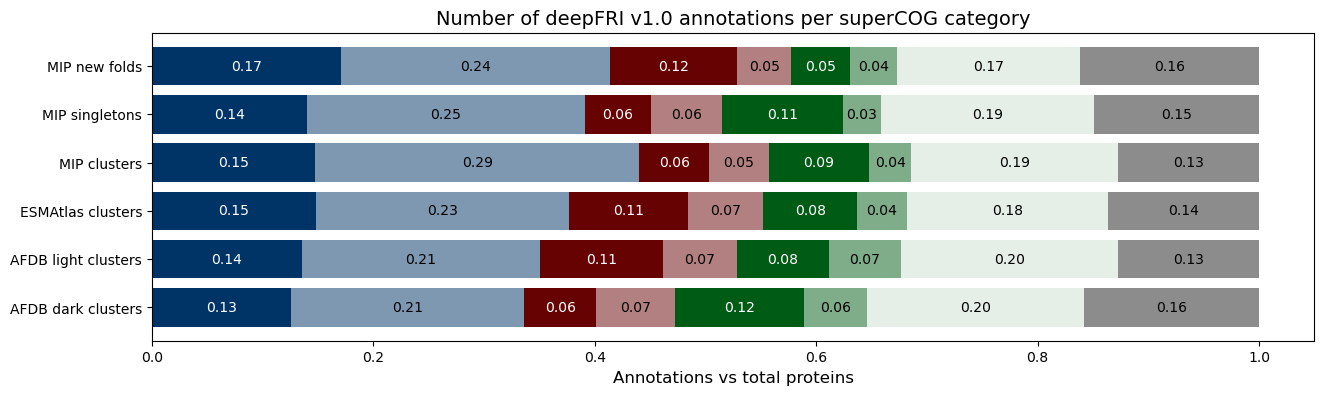

In [6]:
survey(annots_v10, category_names, title="Number of deepFRI v1.0 annotations per superCOG category")

## deepFRI v1.1

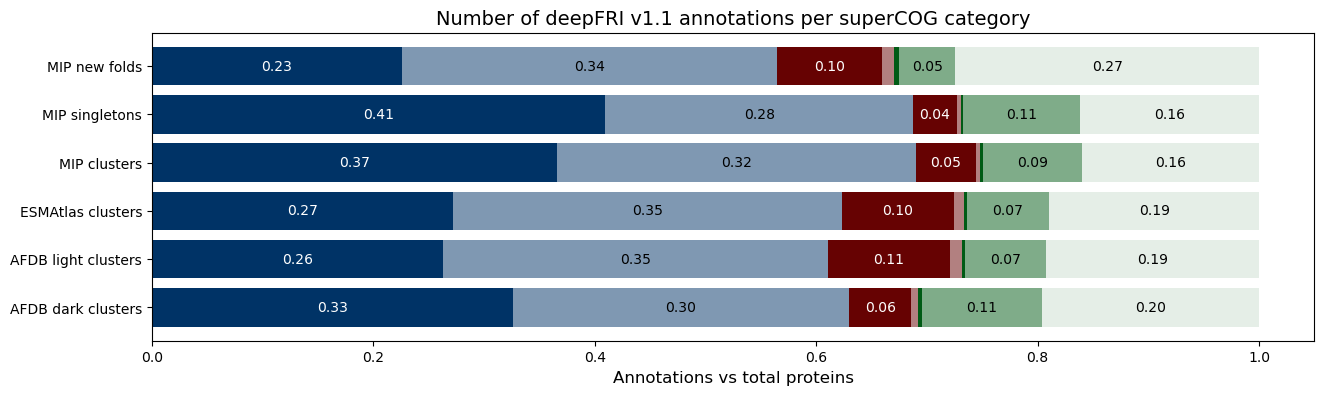

In [7]:
survey(annots_v11, category_names[:-1], "Number of deepFRI v1.1 annotations per superCOG category")

## Legend

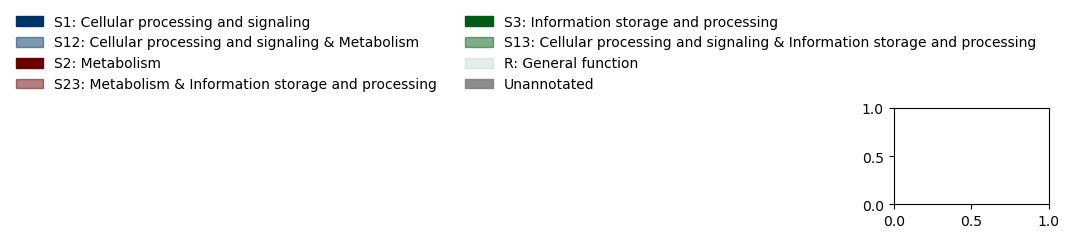

In [8]:
handles = []
fig = plt.figure(figsize=(2, 1.25))
for k, v in colors.items():
    handles.append(mpatches.Patch(color=v, label=k))
plt.legend(handles=handles, ncol=2, frameon=False, bbox_to_anchor=(1,2.1))
plt.show()